# Import Modules

In [1]:
import json
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

# Import Data

In [2]:
root_dir = os.path.join(os.pardir)
print(root_dir)

..


In [3]:
data_part1 = os.path.join(root_dir, "data/raw/logins.json")


# Deserialization of the JSON format
# Open file and import data
with open(data_part1) as f:
    data1 = json.load(f)

In [4]:
# Convert string data to datetime
dates_times = list(data1.values())[0]
Login_time = pd.to_datetime(dates_times)
Values = np.ones(len(Login_time))
df_logins = pd.DataFrame(Values, columns=['Values'], index=Login_time)
df_logins.head()

,Values
1970-01-01 20:13:18,1.0
1970-01-01 20:16:10,1.0
1970-01-01 20:16:37,1.0
1970-01-01 20:16:36,1.0
1970-01-01 20:26:21,1.0


# Part 1

 Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

Let's look at how many logins in each 15 minutes periods. Downsample the series into 15 minute bins and sum the values of the timestamps falling into a bin.

In [5]:
df_login_quarts = df_logins.resample('15T').sum()
df_login_quarts.head(10)

,Values
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0
1970-01-01 22:15:00,8.0


In [6]:
print(f"Last month of the Log data range: {df_login_quarts.index.max().strftime('%B')}")
print(f"First month of the Log data range: {df_login_quarts.index.min().strftime('%B')}")

Last month of the Log data range: April
First month of the Log data range: January


In [7]:
# Monthly activity
df_login_quarts.resample('M').mean().sort_index()

,Values
1970-01-31,7.333909
1970-02-28,9.178943
1970-03-31,11.331653
1970-04-30,10.999186


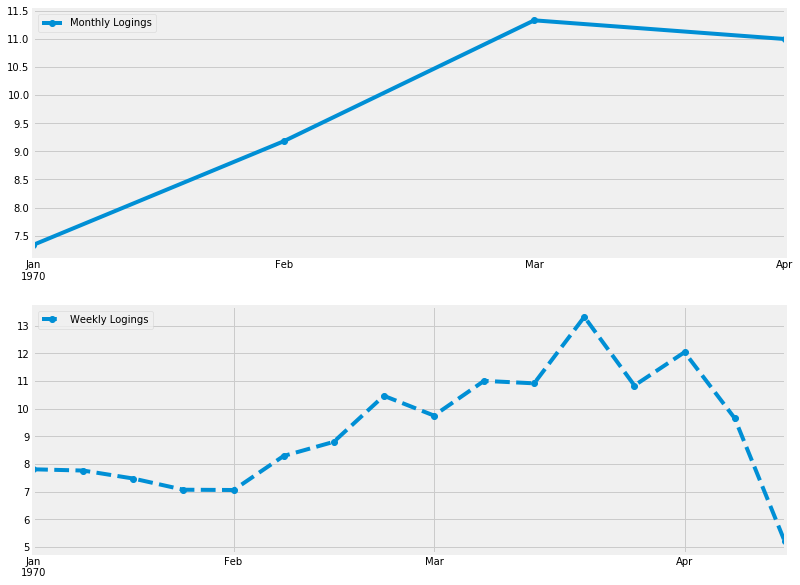

In [8]:
# Weekly trend
fig, ax = plt.subplots(2, sharex=False, figsize=(12,10))

df_login_quarts.resample('M').mean().plot(ax=ax[0], style='-o')
df_login_quarts.resample('W').mean().plot(ax=ax[1], style='--o')
ax[0].legend(['Monthly Logings'])
ax[1].legend(['Weekly Logings'], loc='upper left');

> First plot alone could be misleading as it seems to be started rising from the day one up to mid-March. Let's zoom into weeks.
>
> Here we have change in the mean (rolling mean) number of logins for each Week and Month: It seems that user activity starts ramping up with February and keeps the upward trend till mid March.
Why is that?  Why is April a month of decline? 
Does this trend have any relation to do with weather conditions? Or some series of important events within 45 days ( February till mid March)?
 

>Let's compare daily activity of bad month and the good month. Steep decline in April is considered as bad month whereas in February we see an increasing trend so we can call it a good month for simplicity.
>
> Does Winter/Spring season have an impact on the user activity? 

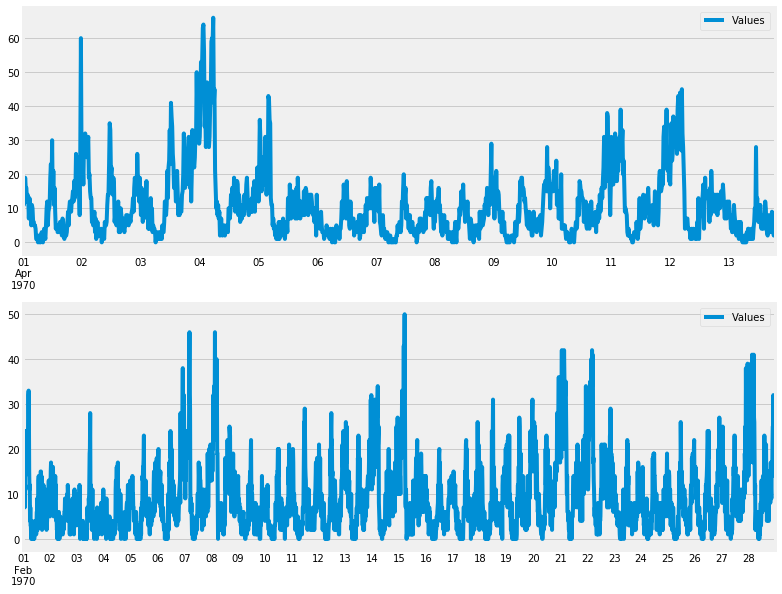

In [9]:
fig, ax = plt.subplots(2, figsize=(12,10))

df_login_quarts['1970-04-01':'1970-04-30'].plot(ax=ax[0])
df_login_quarts['1970-02-01': '1970-02-28'].plot(ax=ax[1]);

> Plots suggest that the month of April does not have data after the 13th of the month. This should be the reason why April seems to have low user activity. Thus, we should not call it bad month!
> We cannot conlcude here that there is pure impact of seasons/ weather conditions on user activity with this level of information.

In [10]:
# Same data is assigned to new variables
declining_days = df_login_quarts['1970-04-01':'1970-04-13'] # last data point in April is from 13th
good_days = df_login_quarts['1970-02-01': '1970-02-28']

> We might want to compare these two months based on activity hours in a day. 

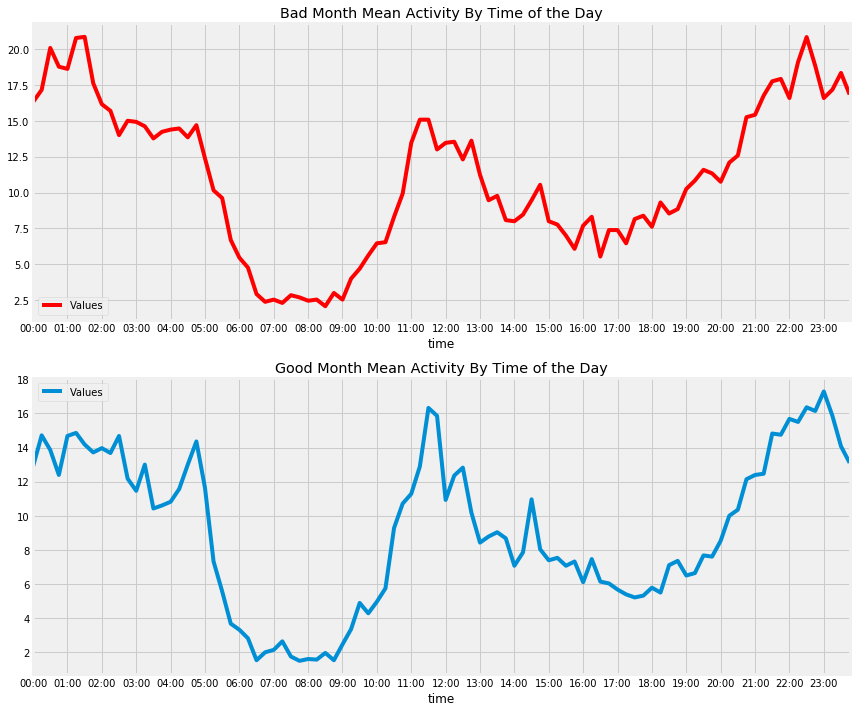

In [11]:
fig, ax = plt.subplots(2, figsize=(12, 10))

quarterly = 60*60*np.arange(24)

bad_ = declining_days.groupby(declining_days.index.time).mean()
bad_.plot(xticks=quarterly, ax=ax[0], c='r')
ax[0].set_title('Bad Month Mean Activity By Time of the Day')

good_ = good_days.groupby(good_days.index.time).mean()
good_.plot(xticks=quarterly, ax=ax[1])
ax[1].set_title('Good Month Mean Activity By Time of the Day')
plt.tight_layout()

> Seems like there is a 12-hour cycle with peaks within a day around 11 pm and 11 am. 
>
> Plots show that there is daily pattern for each case regardless of the total monthly activity. Apparently, the mean user activity in a day very similar regardless off the declining trend during the month.
>
> Lastly, we might also want to see how things change based on the day of the week.

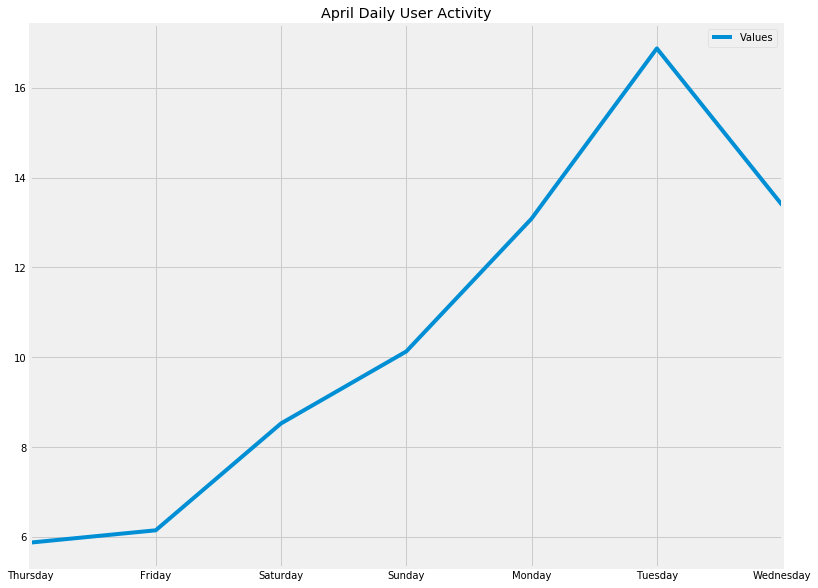

In [12]:
fig, ax = plt.subplots(figsize=(12,10))
by_weekday = declining_days.groupby(declining_days.index.dayofweek).mean()
by_weekday.index = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'] 
by_weekday.plot(ax=ax)
ax.set_title('April Daily User Activity');

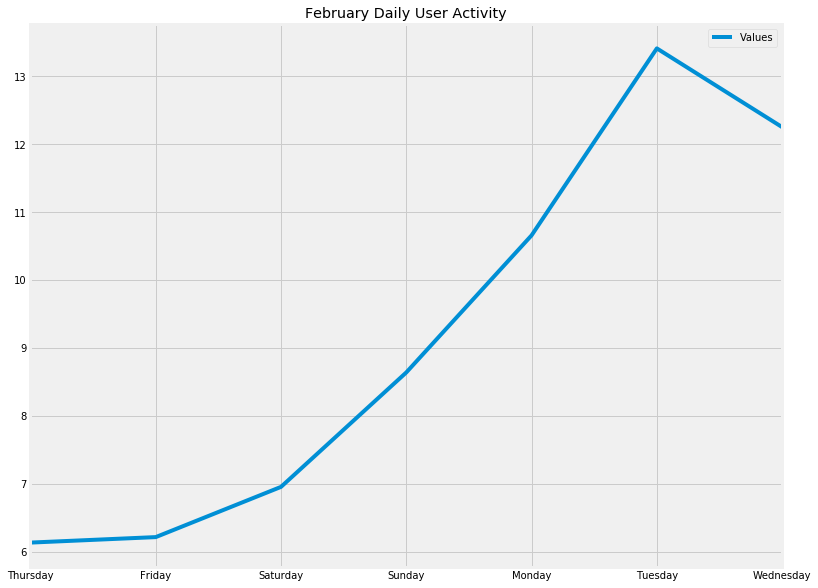

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
by_weekday = good_days.groupby(good_days.index.dayofweek).mean()
by_weekday.index = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'] 
by_weekday.plot(ax=ax)
ax.set_title('February Daily User Activity');

In [14]:
# Monthly activity
df_login_quarts.resample('M').mean().sort_index()

,Values
1970-01-31,7.333909
1970-02-28,9.178943
1970-03-31,11.331653
1970-04-30,10.999186


> So far, we have analyzed two opposite trends to understand underlying reason of the phenomena. As we can see monthly mean user activity above table, it is actually increasing over all starting from January. Although April seemed to be a bad month, the problem is that there was poor data. Even with the poor data, mean user logings is about 11 in first two weeks of April. One also can check if there is remarkable difference in user activity among days as a function of the time of the day. For instance, the time of user logings during the day may differ day to day. 

#  Part 2

In [15]:
data_part2 = os.path.join(root_dir, "data/raw/ultimate_data_challenge.json")

In [16]:
# Deserialization of the JSON format
with open(data_part2) as f:
    data = json.load(f)
    print(data[0])
print('='*50)
print(f'Output format: {type(data)}')
print('='*50)
print(f'Size of data {len(data)}')
print('='*50)
print(f'Features: {list(data[0].keys())}')

{'city': "King's Landing", 'trips_in_first_30_days': 4, 'signup_date': '2014-01-25', 'avg_rating_of_driver': 4.7, 'avg_surge': 1.1, 'last_trip_date': '2014-06-17', 'phone': 'iPhone', 'surge_pct': 15.4, 'ultimate_black_user': True, 'weekday_pct': 46.2, 'avg_dist': 3.67, 'avg_rating_by_driver': 5.0}
Output format: <class 'list'>
Size of data 50000
Features: ['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']


In [17]:
initial_df = pd.DataFrame(data)
initial_df.info()
initial_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [18]:
def missing_values_table(df):
    '''Calculate Missing Values of Each Column'''
    # Total missing amount in each feature /series type
    missing_value = df.isnull().sum()

    # Percentage of that missing values in its column /series type
    miss_percent = 100*missing_value/df.shape[0]

    # Make a table of calculated fields /will make dataframe
    table = pd.concat([missing_value, miss_percent], axis=1).rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort by percentages column
    table.sort_values(by=['% of Total Values'], ascending=False,
                      inplace=True)

    # Print Summary Information
    print('\nThe DataFrame has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str() + ' columns that have missing values')

    return table


missing_values_table(initial_df)


The DataFrame has 12 columns.
There are  columns that have missing values


,Missing Values,% of Total Values
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
avg_dist,0,0.000
avg_surge,0,0.000
city,0,0.000
last_trip_date,0,0.000
signup_date,0,0.000
surge_pct,0,0.000
trips_in_first_30_days,0,0.000


## Problem Statement

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

> What we are testing/experimenting is if reimbursing toll costs would help driver activity across cities.

> Questions: 
- What should be the metric we set to see if the experiment helps diversity of drivers in both cities?
- How would you implement the experiment?
- What statistical tests will you conduct to verify the significance of the observation?
- How would you interpret the results and provide recommendations to the city operations team along with any downsides/warnings?

In [20]:
# Categorical column's unique values ('city')
initial_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

We have 50000 observations and 12 columns in the dataset. The dataset has missing values in "avg_rating_by_driver", " avg_rating_of_driver", and "phone" whose data types are float64, float64 and object respectively. The data ranges about 6 months from January 1 to July 1, of 2014. There are two categorical variables, city and phone. Each of these only has three and two categories, respectively.

### Active Users

In [63]:
initial_df['signup_date'] = pd.to_datetime(initial_df['signup_date'], 
                                           errors='coerce')
initial_df['last_trip_date'] = pd.to_datetime(initial_df['last_trip_date'], 
                                           errors='coerce')
initial_df.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
is_active                           bool
dtype: object

In [64]:
active_dict = {x:False for x in range(0, len(initial_df))}

#Loop over rows
for i in range(len(initial_df)):
    
    #Set the start date of this row
    start = initial_df['signup_date'][i]
    
    #Set the end date for this row: 6 months later
    end = start + pd.Timedelta('181D')
    
    #Set the time window, a month before end date
    previous = end - pd.Timedelta('30D')
    
    #Was the last trip within the last month?
    if previous <= initial_df['last_trip_date'][i] <= end:
        active_dict[i] = True

#What is the percentage of active users?
num_active = sum(active_dict.values())
per_active = num_active/len(active_dict)
print(num_active, per_active)

12198 0.24396


Let's create a column 'is_active' based on our finding. This column will be our target variable for the modelling.

In [23]:
initial_df['is_active'] = (initial_df['last_trip_date'] >= '2014-06-01')
initial_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


There isn't really much more cleaning we need to do right now. If we notice something is off in the data while doing EDA or modelling, we can come back and clean it, but based on our summaries of the data so far, it looks OK.

Let's do some basic EDA showing relationships between numerical features and target target variable

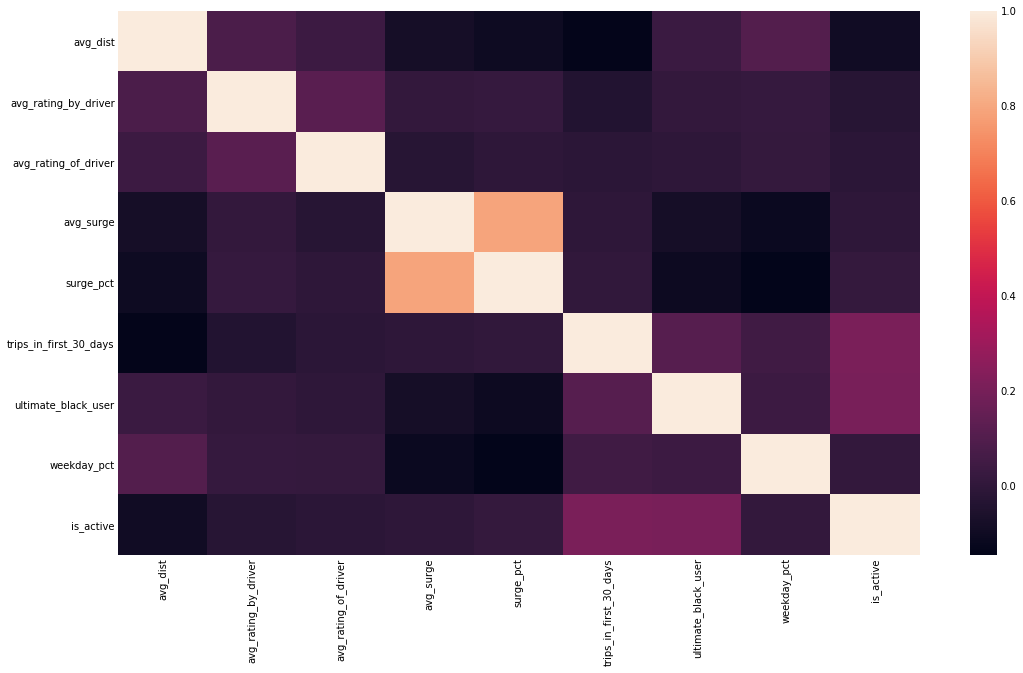

In [24]:
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
corr = initial_df.corr()
ax = sns.heatmap(corr)
plt.show()

In [25]:
# Target variable and numerical features correlation
corr['is_active'].sort_values(ascending = False)

is_active                 1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: is_active, dtype: float64

We see that whether a user was active or not in the system is somewhat correlated with the number of trips in the user's first 30 days and whether they are an Ultimate Black user or not. There isn't much correlation or anti-correlation with anything else.
We haven't yet seen though what the relationship is between is_active and our non-numeric columns: city, phone, and the two date columns. Let's try doing that here.

In [28]:
def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = initial_df.groupby(x).agg({'is_active':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['is_active mean'] = feature['is_active mean']*100
    feature.columns = [x, 'Total Users', 'Active Number', 
                       '% of Active in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots(figsize=(8,6))
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Users'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Active in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Active status compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Users ")
    ax2.set_ylabel("Active Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

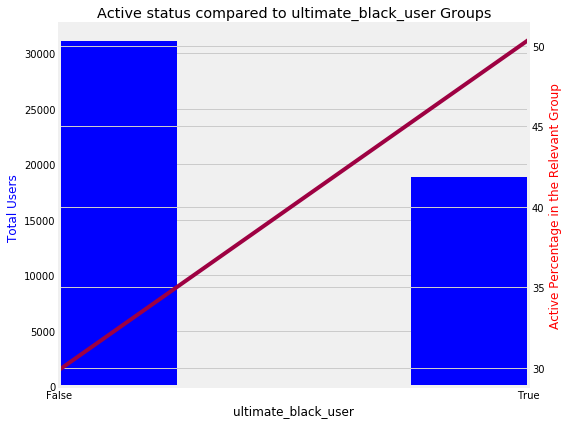

In [29]:
# Plot Target variable and Ultimate Black User Graph
graph_df('ultimate_black_user')

Ultimate Black Users are much more likely to be active in the system as compared to the rest of the users.

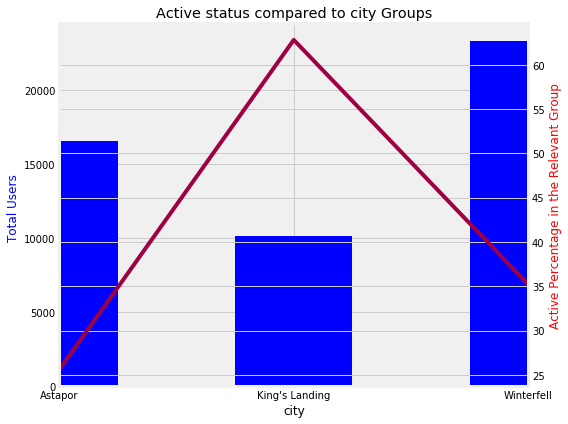

In [30]:
# Plot Target variable and city groups
graph_df('city')

King's Landing seems to be especially successful in retaining users whereas Astapor is the least successful.
Both columns have string values. The best way to handle these 2 columns is to one-hot-encode them. Before we can continue though, we must fill in the null values for the phone column so that we can one-hot-encode them properly in scikit-learn when we need to.

In [31]:
# Fill NAN values in phone column with 'Other'
initial_df['phone'].fillna('Other', inplace=True)
initial_df['phone'].value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [33]:
# Creating dummy variables for 'city' and 'phone' 
cities_ohe = pd.get_dummies(initial_df['city'])
phones_ohe = pd.get_dummies(initial_df['phone'])

In [35]:
# Join the dummy variables with the dataframe
df_dummy = initial_df.join(cities_ohe).join(phones_ohe)

In [36]:
# Drop redundant features
df_dummy.drop(['city', 'phone'], axis=1, inplace=True)

In [38]:
# Move the target variable ('is_active') to the end of the dataset.
col_at_end = ['is_active']
ultimate = df_dummy[[col for col in df_dummy if col not in col_at_end]
                    + [col for col in col_at_end if col in df_dummy]]

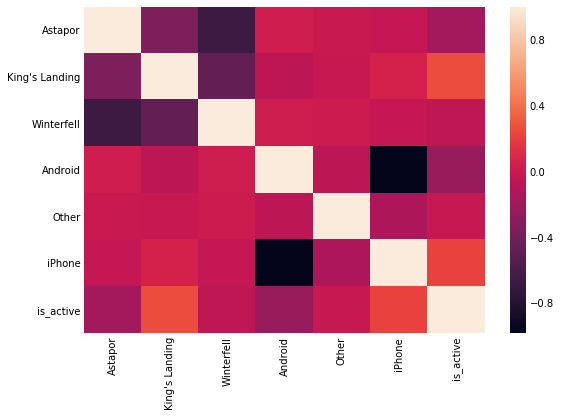

In [40]:
# Let's look for correlation between categorical features
categoricals = ultimate.iloc[:,-7:]
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
corr = categoricals.corr()
ax = sns.heatmap(corr)
plt.show()

In [41]:
corr['is_active'].sort_values(ascending=False)

is_active         1.000000
King's Landing    0.262284
iPhone            0.225244
Other            -0.007419
Winterfell       -0.046611
Astapor          -0.174655
Android          -0.225464
Name: is_active, dtype: float64

We see that being from King's Landing and using an iPhone are associated with being retained. Being from Astapor or Winterfell or using an Android are negatively associated with retention.
With regard to the 2 date columns, if we want to see their correlation with retention, we need to first encode them numerically. We will check how much each is correlated with retention. Obviously, we expect last_trip_date to have a high correlation with retention because the retention column was created from last_trip_date. In the actual model, we will remove last_trip_date in order to prevent it from giving us artificially good performance.

In [42]:
ultimate['signup_date'].describe()

count          50000
unique            31
top       2014-01-18
freq            2948
Name: signup_date, dtype: object

In [43]:
ultimate['last_trip_date'].describe()

count          50000
unique           182
top       2014-06-29
freq            2036
Name: last_trip_date, dtype: object

In [56]:
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'], errors='coerce')
ultimate['signup_date'] = ultimate['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100

In [65]:
ultimate['ultimate_black_user'] = ultimate['ultimate_black_user']*1
ultimate.describe()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,16.54468,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,5.707357,0.446652,0.617338,0.222336,8.75422,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,9.00000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,17.00000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,24.00000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,31.00000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


At this point, we have looked at the relationship between every feature and our created target column 'was_retained'. To handle the 'city' and 'phone' categorical columns we needed to one-hot-encode the features first, and to handle the date columns, we simply converted those columns to the number of days into 2014.
Also, all of our features are numeric now, so we are ready for modelling.

# Part 3
## Modeling

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve

np.random.seed(0)


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint

In [67]:
with open('../data/raw/ultimate_data_challenge.json') as f:
    data = json.load(f)
ultimate_new = pd.DataFrame(data)

ultimate_new['is_active'] = (ultimate_new.last_trip_date >= '2014-06-01')*1
ultimate_new['last_trip_date'] = pd.to_datetime(ultimate_new['last_trip_date'])
ultimate_new['signup_date'] = pd.to_datetime(ultimate_new['signup_date'])
ultimate_new['signup_date'] = ultimate_new['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
ultimate_new['last_trip_date'] = (ultimate_new['last_trip_date'] - min(ultimate_new['last_trip_date'])).dt.days + 1

In [69]:
ultimate_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null int64
phone                     49604 non-null object
signup_date               50000 non-null int64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
is_active                 50000 non-null int64
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 4.6+ MB


In [73]:
ultimate_new['phone'].fillna('Other', inplace=True)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
]
)

numeric_features = [column for column in ultimate.columns.tolist() if column not in categorical_features and
                    column not in ['last_trip_date', 'is_active']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
]
)


In [74]:
X = ultimate_new.drop(['is_active', 'last_trip_date'], axis=1)
y = ultimate_new['is_active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [75]:
classifier_dm = DummyClassifier(strategy="most_frequent", random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_svm = SVC(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)


classifiers = [classifier_dm, classifier_lr, classifier_svm, classifier_rf]

In [76]:
param_grid_dm = None
param_grid_lr = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}

param_grid_svm = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}

param_grid_rf = {
                 'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                 'classifier__n_estimators': [50, 100],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
}


param_grids = [param_grid_dm, param_grid_lr, param_grid_svm, param_grid_rf]

model_names = ['Dummy Model', 'Logistic Regression',  'Support Vector Machine', 'Random Forest']
cv_names = ['dm_cv', 'lr_cv', 'svm_cv', 'rf_cv']
cvs = [None, 5, 5, 5]


In [77]:
def Conf_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    # Instantiate the CV Object
    
    if model_name in ['Dummy Model']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv, iid=False)
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)

    # Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    # Predict on Test

    y_pred = cv.predict(X_test)

    # Scoring

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()

    return cv

In [78]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                 ('classifier', classifier_dm)])
dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)

NameError: name 'time' is not defined

In [79]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_lr)])
lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)

NameError: name 'time' is not defined

In [80]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_svm)])
svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)

NameError: name 'time' is not defined

In [81]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

NameError: name 'time' is not defined

**Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Approach:**

Ultimate's goal is to predict rider retention. Presumably this means they would like to predict users at risk for churn and target them for marketing campaigns, discounts, getting in touch, etc. that would retain these users.
As a result, our model emphasizes minimizing false positives (churned users misclassified as 'active' and thus missed by marketing campaigns, etc), while balancing a reasonable amount of false negatives ('active' users misclassified as churners who would then get spammed with these marketing campaigns).
Predicting churned users
Random Forest algorithm produces the best model with accuracy of about 78%. In addition to having the highest accuracy of any model, we also see that it has the best AUC score of any model, or the best tradeoff between True positive rate and False positive rate. Besides that Random Forest model provides better interpretability than other models, especially in showing feature importance. For all those reasons with comparing other classification models, we chose a Random Forest model to be our model for prediction.
In terms of any concerns we have, the biggest concern would be that we might value false negative more highly than false positives or vice-versa. In that case, we would want to adjust the probability threshold for classification to reflect that.
In terms of model validity, our model is only as accurate as the input data. Also, our model is only as good as we the degree to which we know how to use it. That goes back to the point about precion-recall. First we have to know which we care about more before we can use our model optimally.
Finally, to reiterate the indicators of model performance, we achieved an accuracy of about 78%, and an AUC score of about 84.7%.

**Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).**

In [ ]:
rf_model = rf_cv.best_estimator_

In [ ]:
rf_model.named_steps['classifier'].feature_importances_


We have a problem, though, with getting the feature importances for our model, because scikit-learn does not allow us to extract the features from a pipeline object, so we need to fit our model again, using the optimal parameters that we have already found.

In [ ]:
# Instantiate the model/estimator
classifier_rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=20, 
                                       max_features=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100)


In [ ]:
# Fit on Training
classifier_rf.fit(X_train, y_train)

In [ ]:
# Feature importance as a table
pd.DataFrame(classifier_rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
# Feature importance as a 
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(classifier_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh');

**Promote positive driver-rider interaction:** It seems lower average rating by driver --> more risk for rider churning. Riders probably had dissatisfactory experiences. Encourage drivers to offer amenities that don't cost them much, such as water, candy, etc. Encourage them to ask a basic set of questions to improve rider mood/reduce likelihood of bad driver interaction, such as offering to roll down window, asking about AC, music, etc. Thus, average rating by driver may improve, resulting in less churning.

**More research on surge:** The second most important feature was the percent of trips taken with surge multiplier > 1. We know that this is very slightly positively correlated with retention.ince there is no clear connection here, the best we can say is that Ultimate should do more research into the effects of surges on user retention. Perhaps it is charging surge prices too much and that is scaring users away.

**Target churners with weekday discounts:** From our analysis, percent of user's trips during weekday is important predictor of churning. Increasing churners' weekday trips may therefore improve likelihood of them remaining customers. This could be accomplished by offering them weekday discounts for their Ultimate trips, making Ultimate more of a weekday routine for them and therefore increasing the likelihood they will remain active users.

**Research on King's Landing:** King's Landingseems to be especially successful in retaining users whereas Astapor is the least successful. Ultimate has to see what is unique about King's Landing drivers and passengers and check if it can be implemented in the other cities, especially Astapor.